In [4]:
from sklearn.datasets import fetch_20newsgroups

categories=['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space', 'comp.sys.ibm.pc.hardware', 'sci.crypt']

newsgroups_train=fetch_20newsgroups(subset='train', categories=categories)

print('#Train set size: ', len(newsgroups_train.data))
print('#Selected categories: ', newsgroups_train.target_names)

#Train set size:  3219
#Selected categories:  ['alt.atheism', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.crypt', 'sci.space', 'talk.religion.misc']


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(token_pattern="[\w']{3,}", stop_words='english', max_features=2000, min_df=5, max_df=0.5)
review_cv=cv.fit_transform(newsgroups_train.data)

In [6]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
np.set_printoptions(precision=3)

lda=LatentDirichletAllocation(n_components=10,
                             max_iter=5,
                             topic_word_prior=0.1, doc_topic_prior=1.0,
                             learning_method='online',
                             n_jobs=-1,
                             random_state=0)

review_topics=lda.fit_transform(review_cv)
print('#shape of review_topics: ', review_topics.shape)
print('#Sample of review_topics:', review_topics[0])

gross_topic_weights=np.mean(review_topics, axis=0)
print('#Sum of topic weights of documents: ', gross_topic_weights)

print('#shape of topic word distribution: ', lda.components_.shape)

#shape of review_topics:  (3219, 10)
#Sample of review_topics: [0.903 0.007 0.027 0.008 0.007 0.008 0.007 0.007 0.007 0.018]
#Sum of topic weights of documents:  [0.087 0.083 0.085 0.115 0.115 0.126 0.098 0.072 0.07  0.148]
#shape of topic word distribution:  (10, 2000)


In [12]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end="")
        print(
            ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
    print()
print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: com, morality, keith, article, sgi, think, sandvik, objective, caltech, moral
Topic #1: image, file, graphics, files, ftp, available, software, use, data, mail
Topic #2: space, nasa, access, launch, earth, orbit, shuttle, digex, lunar, satellite
Topic #3: article, com, just, don't, like, i'm, nntp, university, host, posting
Topic #4: key, clipper, chip, encryption, com, government, law, keys, use, escrow
Topic #5: scsi, com, bit, ibm, bus, know, windows, thanks, card, university
Topic #6: host, gov, nntp, posting, university, distribution, nasa, ___, world, com
Topic #7: drive, com, disk, hard, controller, drives, dos, tape, floppy, problem
Topic #8: key, public, message, faq, mail, pgp, des, group, uni, ripem
Topic #9: god, people, don't, jesus, believe, just, does, say, think, know



n_components: 6, perplexity: 1058.260
n_components: 7, perplexity: 1055.111
n_components: 8, perplexity: 1018.328
n_components: 9, perplexity: 1017.749
n_components: 10, perplexity: 1028.686
n_components: 11, perplexity: 1033.398
n_components: 12, perplexity: 1032.112
n_components: 13, perplexity: 1038.642
n_components: 14, perplexity: 1038.627
n_components: 15, perplexity: 1044.712


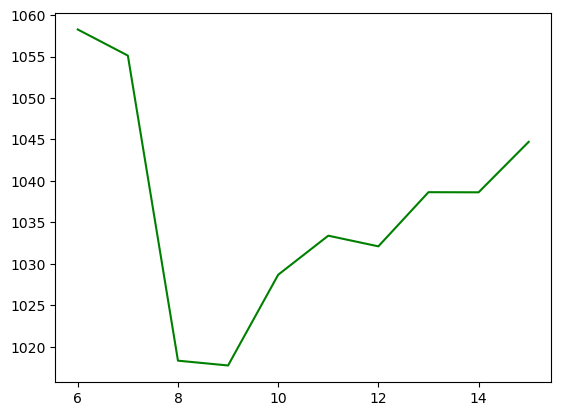

n_components with minimum perplexity:  9


In [14]:
import matplotlib.pyplot as plt

def show_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior=0.1, doc_topic_prior=1.0):
    iter_num=[]
    per_value=[]
    
    for i in range(start, end + 1):
        lda=LatentDirichletAllocation(n_components=i, max_iter=max_iter, topic_word_prior=topic_word_prior,
                                     doc_topic_prior=doc_topic_prior, learning_method='batch', n_jobs=-1,
                                     random_state=7)
        lda.fit(cv)
        iter_num.append(i)
        pv=lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')
        
    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value))

print("n_components with minimum perplexity: ", show_perplexity(review_cv, start=6, end=15))

In [16]:
lda=LatentDirichletAllocation(n_components=8, max_iter=20, topic_word_prior=0.1,
                                     doc_topic_prior=1.0, learning_method='batch', n_jobs=-1,
                                     random_state=7)

review_topics=lda.fit_transform(review_cv)

print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: image, graphics, available, file, mail, ftp, data, information, files, software
Topic #1: posting, nntp, host, com, university, gov, distribution, article, nasa, ___
Topic #2: com, keith, article, morality, think, caltech, sgi, don't, objective, posting
Topic #3: com, jesus, article, know, god, just, don't, people, good, sandvik
Topic #4: people, god, does, don't, think, say, believe, just, like, way
Topic #5: drive, scsi, card, com, disk, ide, controller, hard, bus, use
Topic #6: space, nasa, access, launch, moon, year, article, digex, just, earth
Topic #7: key, encryption, clipper, chip, com, government, keys, use, security, public



In [17]:
pip install --upgrade gensim

     ---------------------------------------- 24.0/24.0 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.0
    Uninstalling gensim-4.3.0:
      Successfully uninstalled gensim-4.3.0
Note: you may need to restart the kernel to use updated packages.


In [19]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

cachedStopWords=stopwords.words('english')

RegTok=RegexpTokenizer("[\w']{3,}")
english_stops=set(stopwords.words('english'))

def tokenizer(text):
    tokens=RegTok.tokenize(text.lower())
    words=[word for word in tokens if (word not in english_stops) and len(word) > 2]
    return words

texts=[tokenizer(news) for news in newsgroups_train.data]

In [21]:
from gensim.corpora.dictionary import Dictionary

dictionary=Dictionary(texts)
print('#Number of initial unique words in documents: ', len(dictionary))

dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)
print('#Number of unique words after removing rare and common words: ', len(dictionary))

corpus=[dictionary.doc2bow(text) for text in texts]
print('#Number of unique tokens: %d' % len(dictionary))
print('#Number of documents: %d' % len(corpus))

#Number of initial unique words in documents:  46466
#Number of unique words after removing rare and common words:  2000
#Number of unique tokens: 2000
#Number of documents: 3219


In [22]:
from gensim.models import LdaModel

num_topics=10
passes=5
%time model=LdaModel(corpus=corpus, id2word=dictionary, passes=passes, num_topics=num_topics, random_state=7)

CPU times: total: 41.1 s
Wall time: 13.8 s


In [23]:
model.print_topics(num_words=10)
print('#topic distribution of the first document: ', model.get_document_topics(corpus)[0])

#topic distribution of the first document:  [(0, 0.7257714), (8, 0.26994845)]


In [25]:
pip install pyLDAvis

     ---------------------------------------- 2.6/2.6 MB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 11.6/11.6 MB 7.5 MB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
     ---------------------------------------- 15.8/15.8 MB 9.8 MB/s eta 0:00:00
     ------------------------------------- 345.4/345.4 kB 10.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.4 which is incompatible.


In [27]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

lda_viz=gensimvis.prepare(model, corpus, dictionary)
lda_viz

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [28]:
from gensim.models import CoherenceModel

cm=CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence=cm.get_coherence()
print(coherence)

-1.7493528544065975


num_topics: 6, perplexity: -7.035, coherence: -1.701
num_topics: 7, perplexity: -7.023, coherence: -1.735
num_topics: 8, perplexity: -7.023, coherence: -1.547
num_topics: 9, perplexity: -7.007, coherence: -1.891
num_topics: 10, perplexity: -6.996, coherence: -1.888
num_topics: 11, perplexity: -7.027, coherence: -2.164
num_topics: 12, perplexity: -7.019, coherence: -2.018
num_topics: 13, perplexity: -7.025, coherence: -2.255
num_topics: 14, perplexity: -7.020, coherence: -2.082
num_topics: 15, perplexity: -7.019, coherence: -2.521


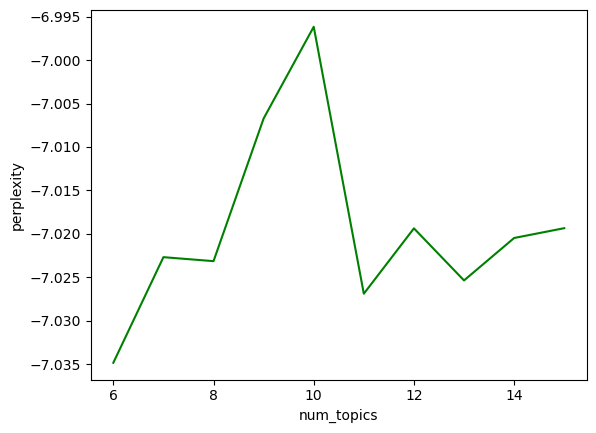

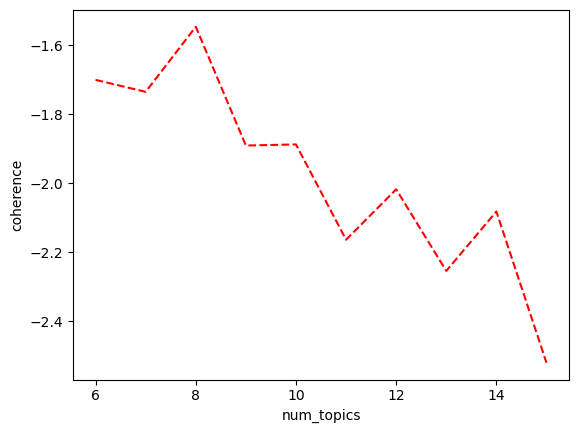

In [30]:
def show_coherence(corpus, dictionary, start=6, end=15):
    iter_num=[]
    per_value=[]
    coh_value=[]
    
    for i in range(start, end+1):
        model=LdaModel(corpus=corpus, id2word=dictionary, chunksize=1000, num_topics=i, random_state=7)
        iter_num.append(i)
        pv=model.log_perplexity(corpus)
        per_value.append(pv)
        
        cm=CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
        cv=cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')
        
    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()
    
    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()
    
show_coherence(corpus, dictionary, start=6, end=15)